In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *


In [2]:
plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=0.2
plt.rcParams['xtick.major.size']=4
plt.rcParams['xtick.minor.size']=2
plt.rcParams['xtick.major.width']=4.1
plt.rcParams['xtick.minor.width']=2.
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=12
plt.rcParams['ytick.minor.size']=6
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=2
plt.rcParams['ytick.direction']='in'

In [3]:

data_path = '/scratch/jh2/av5889/QML/BlastWave/'

In [4]:
infile   = os.path.join(data_path, 'blast_unigrid_128_cpu.in')
# infile   = os.path.join(data_path, 'metal_uniform_512.in')
dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))
dz = (dom_max[2]- dom_min[2])/(fac*int(ncells[2]))
dV = dx * dy * dz

In [5]:
f = 'plt06500/'
inputfile = os.path.join(data_path, f)
ds   = yt.load(inputfile)
ds.current_time.to('Myr')

yt : [INFO     ] 2024-10-14 11:52:24,514 Parameters: current_time              = 0.47459818322179453
yt : [INFO     ] 2024-10-14 11:52:24,517 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-10-14 11:52:24,519 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-14 11:52:24,520 Parameters: domain_right_edge         = [1.2 1.2 1.2]


unyt_quantity(1.50391089e-14, 'Myr')

In [6]:
lev = 0
data = ds.covering_grid(level=lev, left_edge=dom_min, dims=ds.domain_dimensions * fac, num_ghost_zones=0)
timestep = ds.current_time.to('Myr')

rho_gas = np.array(data['gasDensity'])
eint    = np.array(data['gasInternalEnergy'])
vz = np.array(data['z-GasMomentum']) #/rho_gas
np.amax(vz), np.where(rho_gas==np.amax(rho_gas))

(2.001773467346016, (array([45]), array([45]), array([45])))

/jobfs/126707839.gadi-pbs/ipykernel_4152040/1425391152.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0].pcolormesh(yrange,zrange, np.transpose(rho_gas[:,:,plane]),\
/jobfs/126707839.gadi-pbs/ipykernel_4152040/1425391152.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[1].pcolormesh(yrange,zrange, np.transpose(eint[:,plane,:]),\
/jobfs/126707839.gadi-pbs/ipykernel_4152040/1425391152.py:39: MatplotlibDeprecationWarning: shading='

Text(0.4, 0.9, '0.00 Myr')

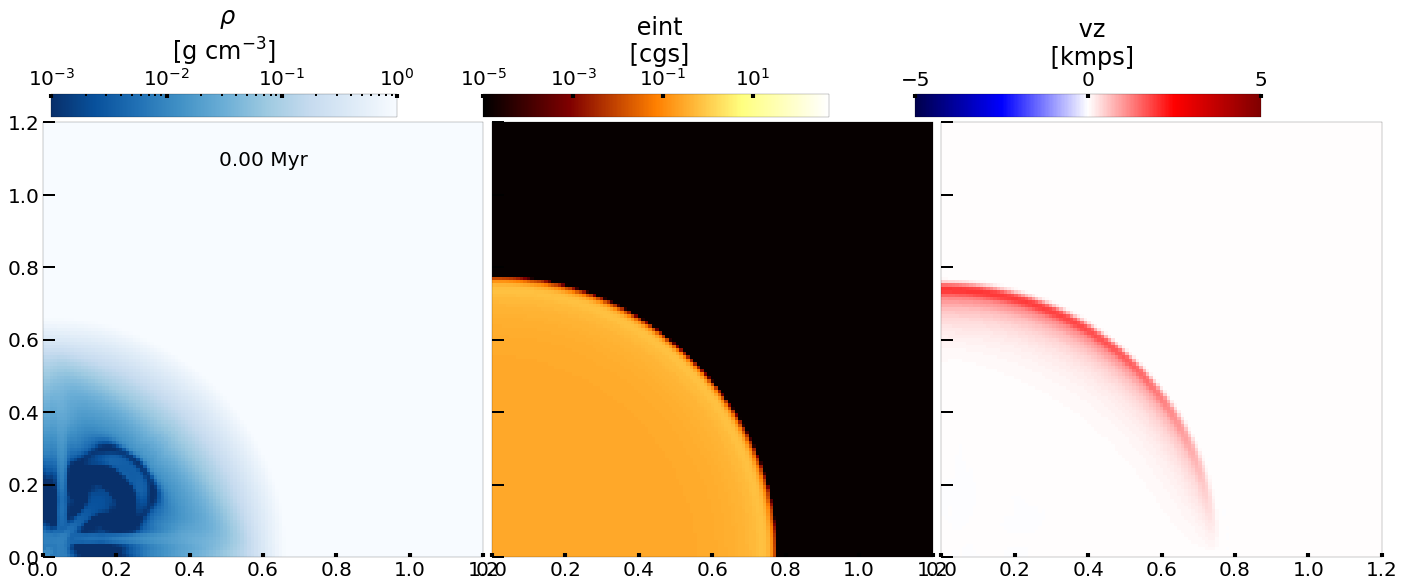

In [7]:
fig, ax = plt.subplots(1, 3, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(24, 8))
i=0

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.2
dx1 = 0.25
cbtitlex = 0.1
cbtitley = 16.5
plane = (int)(ncells[1]/2)
plane = 5

proj_rho = np.sum(rho_gas*dy*vz, axis=1)

plot = ax[0].pcolormesh(yrange,zrange, np.transpose(rho_gas[:,:,plane]),\
                    norm=mcolors.LogNorm(vmin=1.e-3, vmax=1.),
                    cmap='Blues_r')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-3,  1.e-2, 1.e-1, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\rho$" + "\n" + "[g cm$^{-3}$]")



plot = ax[1].pcolormesh(yrange,zrange, np.transpose(eint[:,plane,:]),\
                    norm=mcolors.LogNorm(vmin=1.e-5, vmax=5.e2),
                    cmap='afmhot')
cax = fig.add_axes([cbarx + 1.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-5, 1.e-3, 1.e-1, 1.e1))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" eint" + "\n" + " [cgs]")
ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=False, left=True)

# ax[1].text(0.5,0.8, "%2.1f"%(ds.current_time.to("Myr")) + ' Myr', transform=ax[1].transAxes, fontsize=12)
ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=False, left=True)


plot = ax[2].pcolormesh(yrange,zrange, np.transpose(vz[:,plane,:]),\
                    vmin=-5., vmax=5.,
                    cmap='seismic')
cax = fig.add_axes([cbarx + 2.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-5.,0.0, 5.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" vz" + "\n" + " [kmps]")

ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=False, left=True)
ax[2].tick_params(axis='y', labelleft=False, labelright=False, right=False, left=True)
# ax[1].plot(xrange[1]/kpc, zrange[530]/kpc, '*', color='red', markersize=12)
# ax[0].text(0.5, 0.5, '%.2f'%(ds.current_time.to('Myr')))
# plt.setp(ax, 'ylim',(-2.,6.0))
# plt.setp(ax, 'xlim',(0.6,0.8))
ax[0].text(0.4, 0.9, '%.2f'%(timestep) + ' Myr', transform = ax[0].transAxes, color='black')
# ax[0].text( 0.4, 0.95, 'Res=%d'%(res) +' pc', transform = ax[0].transAxes, color='black')

# plt.setp(ax, 'ylim', (-0.01,8.))